In [59]:
from dataWrangler import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [60]:
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [61]:
df=Spell(frame)
df=Replace(df)

In [ ]:
df=Process(df,'honda civic')
df=Outliers_light(df)

In [68]:
clusters=df[['year:','cylinders:','price:']]

In [75]:
clusters1=clusters[:9000]

In [76]:
clusters1.shape

(9000, 3)

In [77]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(clusters1)


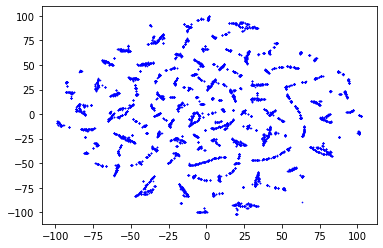

In [79]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys,c='blue',s=0.4)
plt.show()

In [54]:
###pca

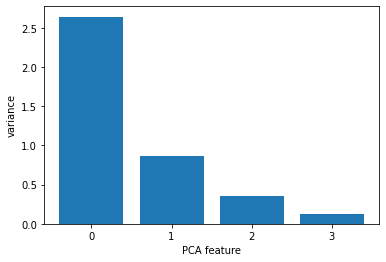

In [55]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df.values)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [56]:
pca.explained_variance_

array([2.64412218, 0.86929567, 0.35967701, 0.129174  ])